# **ML Assignment 5**
Implement K-Nearest Neighbors algorithm on `diabetes.csv` dataset.
Compute confusion matrix, accuracy, error rate, precision, and recall on the given dataset.

Dataset link: [diabetes.csv](https://www.kaggle.com/datasets/abdallamahgoub/diabetes)

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

print(df.head())
df.shape

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


(768, 9)

In [ ]:
# Partition the data into features & target
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [ ]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     Pedigree  Age  
0       0.627   50  
1       0.351   31  
2       0.672   32  
3       0.167   21  
4     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Implement K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

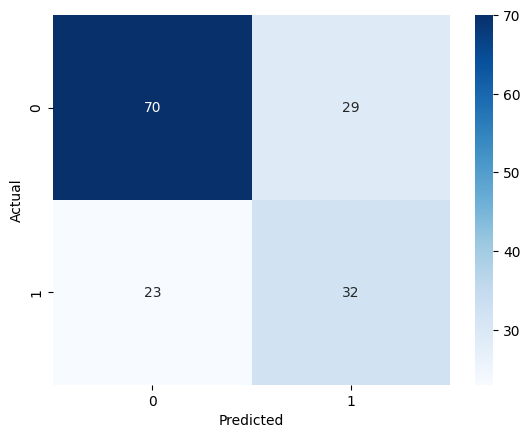

In [ ]:
import seaborn as sns
confusionMatrix = confusion_matrix(y_test, y_pred)

sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Classification Metrics
 Accuracy: $\frac{(TP + TN)}{(TP + TN + FP + FN)}$ \\


 Precision: $\frac{TP}{TP + FP} $ if $(TP + FP)$ != $0$ else $0$ \\


 Recall: $\frac{TP}{TP + FN}$ if $(TP + FN)$ != $0$ else $0$


 Error Rate: $\frac{FP + FN}{TP + TN + FP + FN}$

In [ ]:
TN, FP, FN, TP = confusionMatrix.ravel()

import math as m
def roundUp(value):
    return (m.floor(value * 1000)) / 1000

accuracy = (TP + TN) / (TP + TN + FP + FN)
error_rate = (FP + FN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

print("Accuracy: ", roundUp(accuracy))
print("Error Rate: ", roundUp(error_rate))
print("Precision: ", roundUp(precision))
print("Recall: ", roundUp(recall))

Accuracy:  0.662
Error Rate:  0.337
Precision:  0.524
Recall:  0.581
